In [1]:
import pandas as pd
import numpy as np
import os
import gensim
import random
from sklearn.feature_extraction.text import CountVectorizer
from gensim.matutils import Sparse2Corpus
from gensim.models.ldamodel import LdaModel
from gensim import models, similarities
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import re
import gensim.corpora as corpora
from wordcloud import WordCloud
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import pickle
from pprint import pprint
import matplotlib.pyplot as plt
import re


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salvatoreesposito/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/pylab/config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
# newtxt = []
# with open('dataset/recipes/recipes-mallet.txt', 'r') as txt:
#     for line in txt:
#         newline = line.replace(',', '|',  2)
#         newtxt.append(newline)

# with open('dataset/recipes/recipes-mallet_new.txt', 'w') as file:
#     for line in newtxt:
#         file.writelines(line)


data = pd.read_csv('dataset/recipes/recipes-mallet_new.txt', names=('index', 'cuisine', 'ingredients'), delimiter='|')

print(data.head(5))

   index  cuisine                                        ingredients
0      1        1  broth,chinese cabbage,cornstarch,egg,ginger,gr...
1      2        1  broccoli,cornstarch,garlic,ginger,green onion,...
2      3        1  beef,broccoli,cornstarch,garlic,ginger,peanut ...
3      4        1  bamboo shoot,bean sprouts,celery,chicken,egg,m...
4      5        1  chicken,cornstarch,garlic,ginger,green onion,h...
/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
def select_ingredients():
    # file_path = os.path.expanduser('dataset/recipes/recipes-mallet.txt')
    data = pd.read_csv('dataset/recipes/recipes-mallet_new.txt', names=('index', 'cuisine', 'ingredients'), delimiter='|')
    ingredients_list = data['ingredients'].tolist()
    # Remove punctuation
    ingredients_list = data['ingredients'] = \
    ingredients_list = data['ingredients'].map(lambda x: re.sub('[,\.!?]', '', x))
    # Convert the titles to lowercase
    ingredients_list = data['ingredients'] = \
    ingredients_list = data['ingredients'].map(lambda x: x.lower())

    return ingredients_list, data

ingredients_list,data=select_ingredients()

/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence \.
<>:7: DeprecationWarning: invalid escape sequence \.
<ipython-input-3-592f484dc6c6>:7: DeprecationWarning: invalid escape sequence \.
  ingredients_list = data['ingredients'].map(lambda x: re.sub('[,\.!?]', '', x))


/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


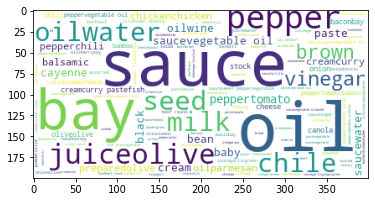

In [4]:
def create_word_cloud():
    # Join the different processed titles together.
    combine_words = ','.join(list(data['ingredients'].values))
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(combine_words)
    # Visualize the word cloud
    wordcloud= plt.imshow(wordcloud)

create_word_cloud()


In [5]:

def preprocess_words(words):
    for word in words:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))

def vectorise_words():
    data_words = list(preprocess_words(data))
    # Create Dictionary
    id2word = corpora.Dictionary(data_words)
    # Create Corpus
    texts = data_words
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    return corpus,id2word

corpus,id2word=vectorise_words()

/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:

def get_similarity(lda, query_vector):
    index = similarities.MatrixSimilarity(lda[corpus],num_features=150000)
    sims = index[query_vector]
    return sims

def lda(ingredients_list):
    #train lda
    ldamodel = LdaModel(corpus,num_topics = 100, passes = 15,random_state = 0)

    return ldamodel,id2word,corpus

ldamodel,id2word,corpus = lda(ingredients_list)


/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
def treat_words (words):
    list_words = words.split(",")
    output = []
    for w in list_words:
        output.append("_".join(w.strip().split(" ")))
    return output


/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
def calculate_similarity(query,ldamodel,id2word):
    # treat input words
    words_bow = id2word.doc2bow(treat_words(query))
    query_vector = ldamodel[words_bow]
    
    #calculate ranking
    sim_rank = get_similarity(lda = ldamodel, query_vector = query_vector)
    sim_rank = sorted(enumerate(sim_rank), key=lambda item: -item[1])
    
    return sim_rank


/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
def calculate_recommendation(sim_rank,groups,n_reco = 50):
    results = [sim_rank[0][0]]
    results_prob = [sim_rank[0][1]]
    result_group = [sim_rank[0][1]]
        
    for recipe,group in zip(sim_rank[1:],groups[1:]):
        if group not in set(result_group):
            results.append(recipe[0])
            result_group.append(group)
            results_prob.append(recipe[1])
        if len(results) == n_reco:
            break
    print(result_group,"\n",results_prob)
    return results

/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# this is a wrapper function for calculate simu and calculate reco
def get_similarity_reco (query,ldamodel,id2word,corpus,n_reco = 50):
    #calculate rank
    sim_rank = calculate_similarity(query,ldamodel,id2word)
    #find groups according to lda model
    groups = []
    for l in ldamodel[corpus]:
        try:
            groups.append(l[0][0])
        except:
            groups.append(random.randint(1, 100))
            
    return calculate_recommendation(sim_rank,groups,n_reco)

/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
def print_reco(results):
    return data.iloc[results]

def pretty_name (name):
    return " ".join([ word.capitalize() for word in name.split(" ") if word != ""])

/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
ldamodel,dictionary,corpus = lda(ingredients_list)

query = 'tomato'

results = get_similarity_reco(query, ldamodel, id2word, corpus, n_reco = 50)

print_reco(results)

[0.0, 51, 77] 
 [0.0, 0.0, 0.0]
/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,cuisine,ingredients
0,1,1,brothchinese cabbagecornstarchegggingergreen o...
1,2,1,broccolicornstarchgarlicgingergreen onionsalts...
2,3,1,beefbroccolicornstarchgarlicgingerpeanut oilsh...


In [13]:
lda_25,dict_25,corpus_25 = lda(ingredients_list)

/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
results_25 = get_similarity_reco (query, lda_25, id2word = dict_25, corpus = corpus_25, n_reco = 100)


[0.0, 62, 91] 
 [0.0, 0.0, 0.0]
/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
print_reco(results_25)


/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,cuisine,ingredients
0,1,1,brothchinese cabbagecornstarchegggingergreen o...
1,2,1,broccolicornstarchgarlicgingergreen onionsalts...
2,3,1,beefbroccolicornstarchgarlicgingerpeanut oilsh...


In [16]:
ldamodel.top_topics(corpus)


/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: The associated dictionary should be provided with the corpus or 'id2word' for topic model should be set as the associated dictionary.